In [4]:
import numpy as np
#from matplotlib import pyplot as plt
#%matplotlib inline
#plt.rcParams.update({'font.size': 16, 'figure.figsize':(8,6)})

import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'xx-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2
import plotter

In [5]:
def plot_training(statistic, res_dir, data_dir, errtag='', subsample=None, version=None, nbins=9, test=False):
    plt.figure(figsize=(10,8)) 
    ps = []

    CC = range(0, 40)
    nhodnonolap = 100
    nhodpercosmo = 100
    HH = np.array(range(0,len(CC)*nhodnonolap))
    HH  = HH.reshape(len(CC), nhodnonolap)
    HH = HH[:,0:nhodpercosmo]
    
    if errtag:
        GP_error = np.loadtxt(f"{res_dir}/{statistic}_error{errtag}.dat")
    
    #color_idx = np.linspace(0, 1, np.max(HH)+1)
    color_idx = np.linspace(0, 1, len(CC))

    for cosmo in CC:
        HH_set = HH[cosmo]
        for hod in HH_set:
            zz = np.random.randint(len(HH.flatten()))
            hod = int(hod)
            color=plt.cm.rainbow(color_idx[cosmo])
            if test:
                for box in range(0,5):
                    fn = '{}/{}_cosmo_{}_Box_{}_HOD_{}_test_0.dat'.format(data_dir, statistic, cosmo, box, hod)
                    r, p = np.loadtxt(fn, delimiter=',',unpack=True)
                    if errtag:
                        plt.errorbar(r[:nbins], p[:nbins], yerr=GP_error[:nbins], lw=0.5, elinewidth=1, capsize=1, color=color, 
                                     zorder=zz)
                    else:
                        plt.plot(r[:nbins], p[:nbins], color=color, lw=0.5, zorder=zz)
            else:
                fn = '{}/{}_cosmo_{}_HOD_{}_test_0.dat'.format(data_dir, statistic, cosmo, hod)
                r, p = np.loadtxt(fn, delimiter=',',unpack=True)
                if errtag:
                    plt.errorbar(r[:nbins], p[:nbins], yerr=GP_error[:nbins], lw=0.5, elinewidth=1, capsize=1, color=color, 
                                 zorder=zz)
                else:
                    plt.plot(r[:nbins], p[:nbins], color=color, lw=0.5, zorder=zz)
                
    plt.yscale("log")
    plt.xlabel("r (Mpc/h)") #is it? are positions in Mpc? not h?
    
    if statistic == 'upf':
        plt.ylabel(r"P$_U$(r)")
        
    elif statistic == 'wp':
        plt.ylabel(r'$w_p$($r_p$)')
        plt.xscale('log')

OSError: ../../clust/results_mcf/training_mcf_fstar8.0_p2.0/mcf_cosmo_1_HOD_100_test_0.dat not found.

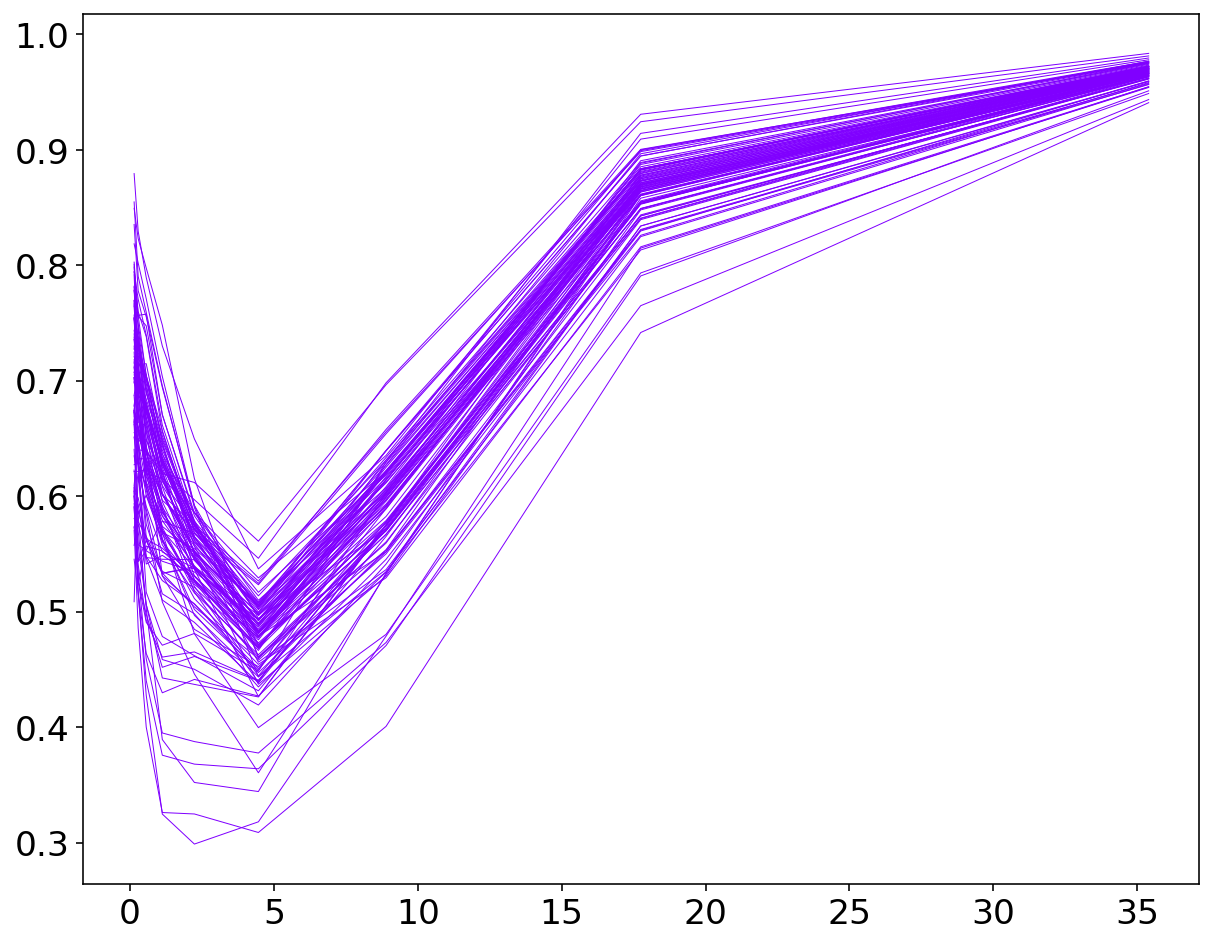

In [6]:
statistic='mcf'
traintag = '_fstar8.0_p2.0'
res_dir = '../../clust/results_{}'.format(statistic)
data_dir = f'{res_dir}/training_{statistic}{traintag}'
plot_training(statistic, res_dir, data_dir)

No handles with labels found to put in legend.


[0]


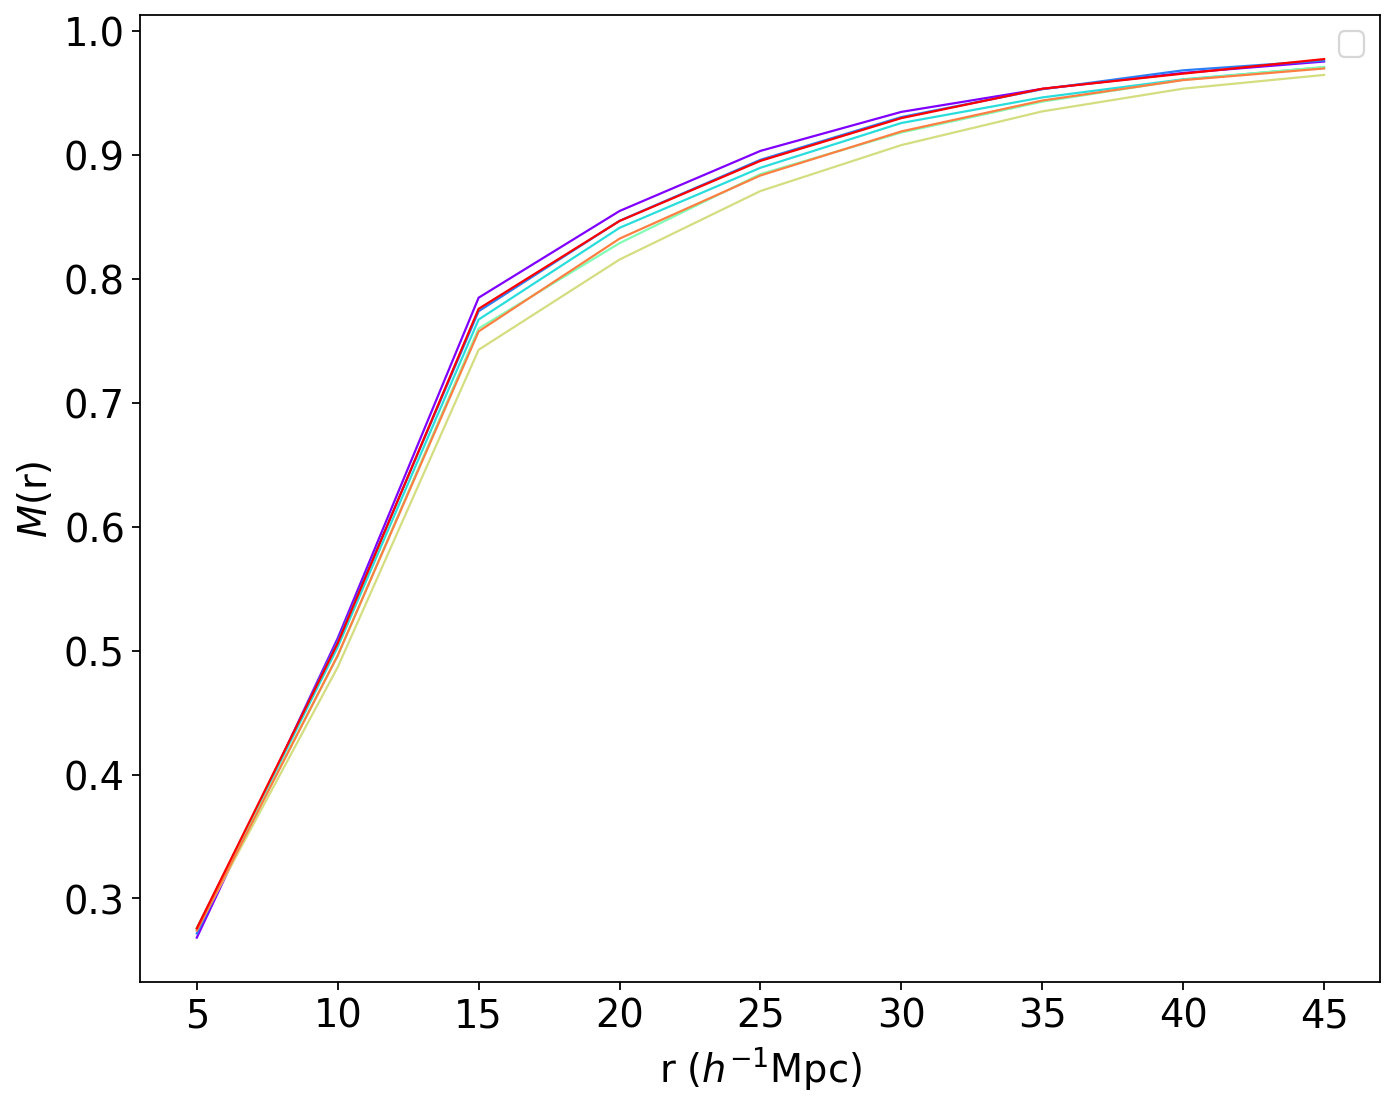

In [27]:
statistic='mcf'
testtag = '_check'
plotter.plot_testing(statistic, testtag, onehod=0, nboxes=1)